In [22]:
from tensorflow import keras
from PIL import Image
import numpy as np
import tensorflow as tf
from keras.applications.xception import preprocess_input

# Functions one by one

In [8]:
def load_style_model() :
    model = keras.models.load_model("../models/model_Xception_alldata.keras")
    return model

In [20]:
def is_valid_image(path):
    """Return True if the image can be decoded, otherwise False"""
    try:
        img = tf.io.read_file(path)
        tf.image.decode_image(img, channels=3)  # accept jpg, png, gif, bmp...
        return True
    except:
        print("Your image is not valid, please upload a valid image")
        return False

In [27]:
def process_image(path):
    """Preprocess a single image before predicting with the model"""
    try:
        img = Image.open(path).convert('RGB')  
        img_resized = img.resize((224, 224), Image.BICUBIC)
        img_array = np.array(img_resized)
        img_preprocessed = preprocess_input(img_array)
        img_batch = np.expand_dims(img_preprocessed, axis=0)  # shape (1,224,224,3)
        return img_batch
    except Exception as e:
        print(f"Error processing {path}: {e}")
        return None


In [30]:
def predict_style(img):
    """Predict style thanks to our model"""
    list_styles = ['Abstract Art', 'Abstract Expressionism', 'Academicism', 'Art Deco', 'Art Informel', 'Art Nouveau (Modern)', 'Biedermeier', 'Color Field Painting', 'Conceptual Art', 'Concretism', 'Contemporary', 'Contemporary Realism', 'Cubism', 'Dada', 'Divisionism', 'Expressionism', 'Fantastic Realism', 'Fauvism', 'Figurative Expressionism', 'Futurism', 'Hard Edge Painting', 'Hyper-Realism', 'Impressionism', 'Kitsch', 'Luminism', 'Lyrical Abstraction', 'Magic Realism', 'Metaphysical art', 'Minimalism', 'Native Art', 'Naturalism', 'Naïve Art (Primitivism)', 'Neo-Dada', 'Neo-Expressionism', 'Neo-Impressionism', 'Neo-Pop Art', 'Neo-Romanticism', 'Neoclassicism', 'New European Painting', 'Op Art', 'Orientalism', 'Pop Art', 'Post-Impressionism', 'Post-Painterly Abstraction', 'Precisionism', 'Realism', 'Regionalism', 'Romanticism', 'Social Realism', 'Socialist Realism', 'Surrealism', 'Symbolism', 'Synthetic Cubism', 'Tachisme', 'Tonalism', 'Transavantgarde']
    model = load_style_model()
    preds = model.predict(img)
    pred_indice = preds.argmax(axis=1)[0] #Take the number
    style_predicted = list_styles[pred_indice]
    return style_predicted

In [16]:
path = "../raw_data/Images to try/Paul_Cézanne_-_The_Basket_of_Apples_-_1926.252_-_Art_Institute_of_Chicago.jpg"

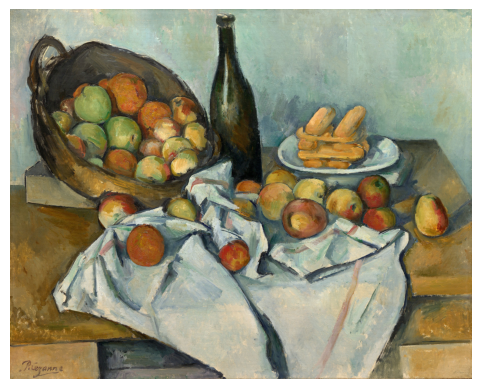

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(path)

plt.imshow(img)
plt.axis("off")
plt.show()


In [21]:
is_valid_image(path)

True

In [28]:
img = process_image(path)

In [31]:
predict_style(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


'Post-Impressionism'

# Whole function 

In [44]:
def get_style(path):  
    """Function to define the style of an image depending on it style"""
    ### Loading model
    model = keras.models.load_model("../models/model_Xception_alldata.keras")
    
    ### Return Try if the image can be decoded
    try:
        img = tf.io.read_file(path)
        tf.image.decode_image(img, channels=3)  # accept jpg, png, gif, bmp...

        ### preprocess the image
        try:
            img = Image.open(path).convert('RGB')  
            img_resized = img.resize((224, 224), Image.BICUBIC)
            img_array = np.array(img_resized)
            img_preprocessed = preprocess_input(img_array)
            img_batch = np.expand_dims(img_preprocessed, axis=0)  # shape (1,224,224,3)

            ### return the predicted style 
            list_styles = ['Abstract Art', 'Abstract Expressionism', 'Academicism', 'Art Deco', 'Art Informel', 'Art Nouveau (Modern)', 'Biedermeier', 'Color Field Painting', 'Conceptual Art', 'Concretism', 'Contemporary', 'Contemporary Realism', 'Cubism', 'Dada', 'Divisionism', 'Expressionism', 'Fantastic Realism', 'Fauvism', 'Figurative Expressionism', 'Futurism', 'Hard Edge Painting', 'Hyper-Realism', 'Impressionism', 'Kitsch', 'Luminism', 'Lyrical Abstraction', 'Magic Realism', 'Metaphysical art', 'Minimalism', 'Native Art', 'Naturalism', 'Naïve Art (Primitivism)', 'Neo-Dada', 'Neo-Expressionism', 'Neo-Impressionism', 'Neo-Pop Art', 'Neo-Romanticism', 'Neoclassicism', 'New European Painting', 'Op Art', 'Orientalism', 'Pop Art', 'Post-Impressionism', 'Post-Painterly Abstraction', 'Precisionism', 'Realism', 'Regionalism', 'Romanticism', 'Social Realism', 'Socialist Realism', 'Surrealism', 'Symbolism', 'Synthetic Cubism', 'Tachisme', 'Tonalism', 'Transavantgarde']
            preds = model.predict(img_batch)
            pred_indice = preds.argmax(axis=1)[0] #Take the number
            style_predicted = list_styles[pred_indice]
            return style_predicted
            
        except Exception as e:
            return "Error processing {path}: {e}"
        
    except:
        return "Your image is not valid, please upload a valid image"

In [36]:
path1 = "../raw_data/Images to try/Paul_Cézanne_-_The_Basket_of_Apples_-_1926.252_-_Art_Institute_of_Chicago.jpg"

In [37]:
get_style(path1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


'Post-Impressionism'

In [40]:
path2 = "../raw_data/Images to try/Piet_Mondriaan,_1942_-_New_York_City_I.jpg"

In [41]:
get_style(path2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


'Minimalism'

In [45]:
path3_error = "hhh.jpg"

In [46]:
get_style(path3_error)

2025-09-09 12:56:23.961796: W tensorflow/core/framework/op_kernel.cc:1855] OP_REQUIRES failed at whole_file_read_ops.cc:117 : NOT_FOUND: hhh.jpg; No such file or directory
2025-09-09 12:56:23.961850: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: NOT_FOUND: hhh.jpg; No such file or directory


'Your image is not valid, please upload a valid image'